In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
os.getcwd()

'C:\\Users\\User'

In [5]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\2')

In [6]:
TSR20_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [7]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR2.0')

In [8]:
TSR20_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [9]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR2')

In [10]:
TSR20_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [11]:
os.chdir('C:\\Users\\User')

In [12]:
TSR20_2D_probe1 = TSR20_2D_probe1.to_numpy(dtype='float32')
TSR20_2D_probe2 = TSR20_2D_probe2.to_numpy(dtype='float32')
TSR20_2D_probe3 = TSR20_2D_probe3.to_numpy(dtype='float32')
TSR20_2D_probe4 = TSR20_2D_probe4.to_numpy(dtype='float32')
TSR20_2D_probe5 = TSR20_2D_probe5.to_numpy(dtype='float32')

In [13]:
TSR20_2_5D_probe1 = TSR20_2_5D_probe1.to_numpy(dtype='float32')
TSR20_2_5D_probe2 = TSR20_2_5D_probe2.to_numpy(dtype='float32')
TSR20_2_5D_probe3 = TSR20_2_5D_probe3.to_numpy(dtype='float32')
TSR20_2_5D_probe4 = TSR20_2_5D_probe4.to_numpy(dtype='float32')
TSR20_2_5D_probe5 = TSR20_2_5D_probe5.to_numpy(dtype='float32')

In [14]:
TSR20_3D_probe1 = TSR20_3D_probe1.to_numpy(dtype='float32')
TSR20_3D_probe2 = TSR20_3D_probe2.to_numpy(dtype='float32')
TSR20_3D_probe3 = TSR20_3D_probe3.to_numpy(dtype='float32')
TSR20_3D_probe4 = TSR20_3D_probe4.to_numpy(dtype='float32')
TSR20_3D_probe5 = TSR20_3D_probe5.to_numpy(dtype='float32')

In [15]:
x20_2D_probe1 = TSR20_2D_probe1[:36, 4]
x20_2D_probe2 = TSR20_2D_probe2[:36, 4]
x20_2D_probe3 = TSR20_2D_probe3[:36, 4]
x20_2D_probe4 = TSR20_2D_probe4[:36, 4]
x20_2D_probe5 = TSR20_2D_probe5[:36, 4]

In [16]:
x20_2_5D_probe1 = TSR20_2_5D_probe1[:36, 4]
x20_2_5D_probe2 = TSR20_2_5D_probe2[:36, 4]
x20_2_5D_probe3 = TSR20_2_5D_probe3[:36, 4]
x20_2_5D_probe4 = TSR20_2_5D_probe4[:36, 4]
x20_2_5D_probe5 = TSR20_2_5D_probe5[:36, 4]

In [17]:
x20_3D_probe1 = TSR20_3D_probe1[:36, 4]
x20_3D_probe2 = TSR20_3D_probe2[:36, 4]
x20_3D_probe3 = TSR20_3D_probe3[:36, 4]
x20_3D_probe4 = TSR20_3D_probe4[:36, 4]
x20_3D_probe5 = TSR20_3D_probe5[:36, 4]

In [18]:
x20_2D_probe1 = x20_2D_probe1.reshape((36, 1))
x20_2D_probe2 = x20_2D_probe2.reshape((36, 1))
x20_2D_probe3 = x20_2D_probe3.reshape((36, 1))
x20_2D_probe4 = x20_2D_probe4.reshape((36, 1))
x20_2D_probe5 = x20_2D_probe5.reshape((36, 1))

In [19]:
x20_2_5D_probe1 = x20_2_5D_probe1.reshape((36, 1))
x20_2_5D_probe2 = x20_2_5D_probe2.reshape((36, 1))
x20_2_5D_probe3 = x20_2_5D_probe3.reshape((36, 1))
x20_2_5D_probe4 = x20_2_5D_probe4.reshape((36, 1))
x20_2_5D_probe5 = x20_2_5D_probe5.reshape((36, 1))

In [20]:
x20_3D_probe1 = x20_3D_probe1.reshape((36, 1))
x20_3D_probe2 = x20_3D_probe2.reshape((36, 1))
x20_3D_probe3 = x20_3D_probe3.reshape((36, 1))
x20_3D_probe4 = x20_3D_probe4.reshape((36, 1))
x20_3D_probe5 = x20_3D_probe5.reshape((36, 1))

In [21]:
print(x20_3D_probe5.shape)

(36, 1)


In [22]:
x_train20 = np.hstack((x20_2D_probe1, x20_2D_probe2, x20_2D_probe3, x20_2D_probe4, x20_2D_probe5,
                       x20_2_5D_probe1, x20_2_5D_probe2, x20_2_5D_probe3, x20_2_5D_probe4, x20_2_5D_probe5,
                       x20_3D_probe1, x20_3D_probe2, x20_3D_probe3, x20_3D_probe4, x20_3D_probe5))

In [23]:
x = x_train20.reshape((36, n_sensors, 1))

In [24]:
os.chdir('C:\\Users\\User\\Downloads\\TSR2_vor\\TSR2_vor')

In [25]:
vor20_000 = pd.read_csv('TSR2_1.csv', header=None)
vor20_010 = pd.read_csv('TSR2_2.csv', header=None)
vor20_020 = pd.read_csv('TSR2_3.csv', header=None)
vor20_030 = pd.read_csv('TSR2_4.csv', header=None)
vor20_040 = pd.read_csv('TSR2_5.csv', header=None)
vor20_050 = pd.read_csv('TSR2_6.csv', header=None)
vor20_060 = pd.read_csv('TSR2_7.csv', header=None)
vor20_070 = pd.read_csv('TSR2_8.csv', header=None)
vor20_080 = pd.read_csv('TSR2_9.csv', header=None)
vor20_090 = pd.read_csv('TSR2_10.csv', header=None)
vor20_100 = pd.read_csv('TSR2_11.csv', header=None)
vor20_110 = pd.read_csv('TSR2_12.csv', header=None)
vor20_120 = pd.read_csv('TSR2_13.csv', header=None)
vor20_130 = pd.read_csv('TSR2_14.csv', header=None)
vor20_140 = pd.read_csv('TSR2_15.csv', header=None)
vor20_150 = pd.read_csv('TSR2_16.csv', header=None)
vor20_160 = pd.read_csv('TSR2_17.csv', header=None)
vor20_170 = pd.read_csv('TSR2_18.csv', header=None)
vor20_180 = pd.read_csv('TSR2_19.csv', header=None)
vor20_190 = pd.read_csv('TSR2_20.csv', header=None)
vor20_200 = pd.read_csv('TSR2_21.csv', header=None)
vor20_210 = pd.read_csv('TSR2_22.csv', header=None)
vor20_220 = pd.read_csv('TSR2_23.csv', header=None)
vor20_230 = pd.read_csv('TSR2_24.csv', header=None)
vor20_240 = pd.read_csv('TSR2_25.csv', header=None)
vor20_250 = pd.read_csv('TSR2_26.csv', header=None)
vor20_260 = pd.read_csv('TSR2_27.csv', header=None)
vor20_270 = pd.read_csv('TSR2_28.csv', header=None)
vor20_280 = pd.read_csv('TSR2_29.csv', header=None)
vor20_290 = pd.read_csv('TSR2_30.csv', header=None)
vor20_300 = pd.read_csv('TSR2_31.csv', header=None)
vor20_310 = pd.read_csv('TSR2_32.csv', header=None)
vor20_320 = pd.read_csv('TSR2_33.csv', header=None)
vor20_330 = pd.read_csv('TSR2_34.csv', header=None)
vor20_340 = pd.read_csv('TSR2_35.csv', header=None)
vor20_350 = pd.read_csv('TSR2_36.csv', header=None)

In [26]:
vor20_000 = vor20_000.to_numpy(dtype='float32')
vor20_010 = vor20_010.to_numpy(dtype='float32')
vor20_020 = vor20_020.to_numpy(dtype='float32')
vor20_030 = vor20_030.to_numpy(dtype='float32')
vor20_040 = vor20_040.to_numpy(dtype='float32')
vor20_050 = vor20_050.to_numpy(dtype='float32')
vor20_060 = vor20_060.to_numpy(dtype='float32')
vor20_070 = vor20_070.to_numpy(dtype='float32')
vor20_080 = vor20_080.to_numpy(dtype='float32')
vor20_090 = vor20_090.to_numpy(dtype='float32')
vor20_100 = vor20_100.to_numpy(dtype='float32')
vor20_110 = vor20_110.to_numpy(dtype='float32')
vor20_120 = vor20_120.to_numpy(dtype='float32')
vor20_130 = vor20_130.to_numpy(dtype='float32')
vor20_140 = vor20_140.to_numpy(dtype='float32')
vor20_150 = vor20_150.to_numpy(dtype='float32')
vor20_160 = vor20_160.to_numpy(dtype='float32')
vor20_170 = vor20_170.to_numpy(dtype='float32')
vor20_180 = vor20_180.to_numpy(dtype='float32')
vor20_190 = vor20_190.to_numpy(dtype='float32')
vor20_200 = vor20_200.to_numpy(dtype='float32')
vor20_210 = vor20_210.to_numpy(dtype='float32')
vor20_220 = vor20_220.to_numpy(dtype='float32')
vor20_230 = vor20_230.to_numpy(dtype='float32')
vor20_240 = vor20_240.to_numpy(dtype='float32')
vor20_250 = vor20_250.to_numpy(dtype='float32')
vor20_260 = vor20_260.to_numpy(dtype='float32')
vor20_270 = vor20_270.to_numpy(dtype='float32')
vor20_280 = vor20_280.to_numpy(dtype='float32')
vor20_290 = vor20_290.to_numpy(dtype='float32')
vor20_300 = vor20_300.to_numpy(dtype='float32')
vor20_310 = vor20_310.to_numpy(dtype='float32')
vor20_320 = vor20_320.to_numpy(dtype='float32')
vor20_330 = vor20_330.to_numpy(dtype='float32')
vor20_340 = vor20_340.to_numpy(dtype='float32')
vor20_350 = vor20_350.to_numpy(dtype='float32')

In [27]:
TSR20_field = np.vstack((vor20_000, vor20_010, vor20_020, vor20_030, vor20_040, vor20_050, vor20_060, vor20_070,
                         vor20_080, vor20_090, vor20_100, vor20_110, vor20_120, vor20_130, vor20_140, vor20_150,
                         vor20_160, vor20_170, vor20_180, vor20_190, vor20_200, vor20_210, vor20_220, vor20_230,
                         vor20_240, vor20_250, vor20_260, vor20_270, vor20_280, vor20_290, vor20_300, vor20_310,
                         vor20_320, vor20_330, vor20_340, vor20_350))

In [28]:
TSR20_field.shape

(3600, 100)

In [29]:
y = TSR20_field.reshape((36, 100, 100))

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)

In [31]:
print(y_train.shape)

(25, 100, 100)


In [32]:
print(y_test.shape)

(11, 100, 100)


In [33]:
print(x_train.shape)

(25, 15, 1)


In [34]:
print(x_test.shape)

(11, 15, 1)


In [35]:
os.chdir('C:\\Users\\User')

In [36]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.BatchNormalization()(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [37]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2048      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [38]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [39]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.3206 - rmse: 0.1944
Epoch 2/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3190 - rmse: 0.1918
Epoch 3/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3175 - rmse: 0.1890
Epoch 4/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3159 - rmse: 0.1862
Epoch 5/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.3143 - rmse: 0.1834
Epoch 6/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3128 - rmse: 0.1806
Epoch 7/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3113 - rmse: 0.1778
Epoch 8/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.3098 - rmse: 0.1751
Epoch 9/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.3083 - rmse: 0.1723
Epoch 10/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3068 - rmse: 0.1696
Epoch 11/10000
1/1 [==========================

1/1 [==============================] - 0s 8ms/step - loss: 0.2477 - rmse: 0.0832
Epoch 87/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2472 - rmse: 0.0830
Epoch 88/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2466 - rmse: 0.0827
Epoch 89/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2461 - rmse: 0.0825
Epoch 90/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2456 - rmse: 0.0822
Epoch 91/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2451 - rmse: 0.0820
Epoch 92/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2446 - rmse: 0.0818
Epoch 93/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2441 - rmse: 0.0816
Epoch 94/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2437 - rmse: 0.0813
Epoch 95/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2432 - rmse: 0.0811
Epoch 96/10000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 0.1766 - rmse: 0.0573
Epoch 255/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1762 - rmse: 0.0572
Epoch 256/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1759 - rmse: 0.0570
Epoch 257/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1755 - rmse: 0.0568
Epoch 258/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1751 - rmse: 0.0566
Epoch 259/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1748 - rmse: 0.0564
Epoch 260/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1744 - rmse: 0.0562
Epoch 261/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1741 - rmse: 0.0560
Epoch 262/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1737 - rmse: 0.0558
Epoch 263/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1733 - rmse: 0.0556
Epoch 264/10000
1/1 [====================

1/1 [==============================] - 0s 8ms/step - loss: 0.1243 - rmse: 0.0248
Epoch 423/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1240 - rmse: 0.0246
Epoch 424/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1238 - rmse: 0.0245
Epoch 425/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1235 - rmse: 0.0244
Epoch 426/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1232 - rmse: 0.0242
Epoch 427/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1230 - rmse: 0.0241
Epoch 428/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1227 - rmse: 0.0239
Epoch 429/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1225 - rmse: 0.0238
Epoch 430/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1222 - rmse: 0.0237
Epoch 431/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1220 - rmse: 0.0235
Epoch 432/10000
1/1 [===================

1/1 [==============================] - 0s 8ms/step - loss: 0.1043 - rmse: 0.0156
Epoch 507/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1040 - rmse: 0.0155
Epoch 508/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1038 - rmse: 0.0154
Epoch 509/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1036 - rmse: 0.0154
Epoch 510/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1034 - rmse: 0.0153
Epoch 511/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1032 - rmse: 0.0152
Epoch 512/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1030 - rmse: 0.0151
Epoch 513/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1027 - rmse: 0.0150
Epoch 514/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1025 - rmse: 0.0149
Epoch 515/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1023 - rmse: 0.0149
Epoch 516/10000
1/1 [====================

1/1 [==============================] - 0s 9ms/step - loss: 0.0730 - rmse: 0.0081
Epoch 675/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0729 - rmse: 0.0081
Epoch 676/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0727 - rmse: 0.0081
Epoch 677/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0726 - rmse: 0.0081
Epoch 678/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0724 - rmse: 0.0080
Epoch 679/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0723 - rmse: 0.0080
Epoch 680/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0721 - rmse: 0.0080
Epoch 681/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0719 - rmse: 0.0079
Epoch 682/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0718 - rmse: 0.0079
Epoch 683/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0716 - rmse: 0.0079
Epoch 684/10000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0506 - rmse: 0.0058
Epoch 843/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0504 - rmse: 0.0058
Epoch 844/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503 - rmse: 0.0058
Epoch 845/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0502 - rmse: 0.0057
Epoch 846/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0501 - rmse: 0.0057
Epoch 847/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0500 - rmse: 0.0057
Epoch 848/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0499 - rmse: 0.0058
Epoch 849/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0498 - rmse: 0.0059
Epoch 850/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0497 - rmse: 0.0059
Epoch 851/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0495 - rmse: 0.0059
Epoch 852/10000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.0049
Epoch 1011/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.0048
Epoch 1012/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - rmse: 0.0046
Epoch 1013/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0343 - rmse: 0.0050
Epoch 1014/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0342 - rmse: 0.0047
Epoch 1015/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0341 - rmse: 0.0046
Epoch 1016/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0341 - rmse: 0.0049
Epoch 1017/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0340 - rmse: 0.0047
Epoch 1018/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0339 - rmse: 0.0048
Epoch 1019/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0338 - rmse: 0.0050
Epoch 1020/10000
1/1 [=============

1/1 [==============================] - 0s 8ms/step - loss: 0.0235 - rmse: 0.0041
Epoch 1177/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0234 - rmse: 0.0040
Epoch 1178/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0234 - rmse: 0.0043
Epoch 1179/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0233 - rmse: 0.0045
Epoch 1180/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.0047
Epoch 1181/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.0043
Epoch 1182/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0231 - rmse: 0.0043
Epoch 1183/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0231 - rmse: 0.0042
Epoch 1184/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0230 - rmse: 0.0039
Epoch 1185/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0230 - rmse: 0.0038
Epoch 1186/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.0158 - rmse: 0.0048
Epoch 1343/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0158 - rmse: 0.0047
Epoch 1344/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0158 - rmse: 0.0042
Epoch 1345/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0157 - rmse: 0.0041
Epoch 1346/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0157 - rmse: 0.0046
Epoch 1347/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0157 - rmse: 0.0042
Epoch 1348/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0156 - rmse: 0.0040
Epoch 1349/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0041
Epoch 1350/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0155 - rmse: 0.0040
Epoch 1351/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0155 - rmse: 0.0036
Epoch 1352/10000
1/1 [=============

1/1 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.0032
Epoch 1509/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0033
Epoch 1510/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0032
Epoch 1511/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.0028
Epoch 1512/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.0029
Epoch 1513/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0034
Epoch 1514/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0105 - rmse: 0.0036
Epoch 1515/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0105 - rmse: 0.0032
Epoch 1516/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0105 - rmse: 0.0030
Epoch 1517/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0035
Epoch 1518/10000
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0047
Epoch 1675/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0039
Epoch 1676/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0030
Epoch 1677/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0035
Epoch 1678/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0045
Epoch 1679/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0048
Epoch 1680/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0043
Epoch 1681/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0035
Epoch 1682/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0042
Epoch 1683/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0071 - rmse: 0.0050
Epoch 1684/10000
1/1 [==========

1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0031
Epoch 1841/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0030
Epoch 1842/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0027
Epoch 1843/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0028
Epoch 1844/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0033
Epoch 1845/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0037
Epoch 1846/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0038
Epoch 1847/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0033
Epoch 1848/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0029
Epoch 1849/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0030
Epoch 1850/10000
1/1 [============

1/1 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0032
Epoch 2007/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0027
Epoch 2008/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0032
Epoch 2009/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0038
Epoch 2010/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0039
Epoch 2011/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0036
Epoch 2012/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0030
Epoch 2013/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0032
Epoch 2014/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0040
Epoch 2015/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0037
Epoch 2016/10000
1/1 [===========

1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0029
Epoch 2173/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0028
Epoch 2174/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0034
Epoch 2175/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0035
Epoch 2176/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0031
Epoch 2177/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0026
Epoch 2178/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0029
Epoch 2179/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0037
Epoch 2180/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0039
Epoch 2181/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0035
Epoch 2182/10000
1/1 [============

1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 2339/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0033
Epoch 2340/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 2341/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0030
Epoch 2342/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0029
Epoch 2343/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 2344/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 2345/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0027
Epoch 2346/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0029
Epoch 2347/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0033
Epoch 2348/10000
1/1 [============

1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 2505/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 2506/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 2507/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0030
Epoch 2508/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0028
Epoch 2509/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 2510/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 2511/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 2512/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0030
Epoch 2513/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0029
Epoch 2514/10000
1/1 [============

1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 2671/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 2672/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 2673/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 2674/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 2675/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 2676/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0036
Epoch 2677/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0032
Epoch 2678/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 2679/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 2680/10000
1/1 [===========

1/1 [==============================] - 0s 10ms/step - loss: 8.6143e-04 - rmse: 0.0029
Epoch 2832/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.5919e-04 - rmse: 0.0026
Epoch 2833/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5988e-04 - rmse: 0.0029
Epoch 2834/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.6190e-04 - rmse: 0.0034
Epoch 2835/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.6174e-04 - rmse: 0.0035
Epoch 2836/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5821e-04 - rmse: 0.0032
Epoch 2837/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.5448e-04 - rmse: 0.0027
Epoch 2838/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5333e-04 - rmse: 0.0027
Epoch 2839/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5287e-04 - rmse: 0.0028
Epoch 2840/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.5201e-04 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 7.2642e-04 - rmse: 0.0030
Epoch 2992/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.2973e-04 - rmse: 0.0036
Epoch 2993/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.2975e-04 - rmse: 0.0037
Epoch 2994/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.2560e-04 - rmse: 0.0032
Epoch 2995/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.2172e-04 - rmse: 0.0026
Epoch 2996/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.2222e-04 - rmse: 0.0028
Epoch 2997/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.2488e-04 - rmse: 0.0034
Epoch 2998/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.2487e-04 - rmse: 0.0035
Epoch 2999/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.2083e-04 - rmse: 0.0030
Epoch 3000/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.1796e-04 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 6.7644e-04 - rmse: 0.0034
Epoch 3072/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.7276e-04 - rmse: 0.0029
Epoch 3073/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.7024e-04 - rmse: 0.0026
Epoch 3074/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.7071e-04 - rmse: 0.0028
Epoch 3075/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.7353e-04 - rmse: 0.0033
Epoch 3076/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.7380e-04 - rmse: 0.0035
Epoch 3077/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.7073e-04 - rmse: 0.0031
Epoch 3078/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.6743e-04 - rmse: 0.0026
Epoch 3079/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.6658e-04 - rmse: 0.0026
Epoch 3080/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.6733e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 6.2569e-04 - rmse: 0.0025
Epoch 3152/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.2678e-04 - rmse: 0.0028
Epoch 3153/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.2893e-04 - rmse: 0.0033
Epoch 3154/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2909e-04 - rmse: 0.0034
Epoch 3155/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.2563e-04 - rmse: 0.0029
Epoch 3156/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.2330e-04 - rmse: 0.0025
Epoch 3157/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.2247e-04 - rmse: 0.0025
Epoch 3158/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.2279e-04 - rmse: 0.0027
Epoch 3159/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.2405e-04 - rmse: 0.0030
Epoch 3160/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2535e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 5.8648e-04 - rmse: 0.0026
Epoch 3232/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.8763e-04 - rmse: 0.0029
Epoch 3233/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.8900e-04 - rmse: 0.0032
Epoch 3234/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.8972e-04 - rmse: 0.0034
Epoch 3235/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.8809e-04 - rmse: 0.0032
Epoch 3236/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.8580e-04 - rmse: 0.0029
Epoch 3237/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.8352e-04 - rmse: 0.0026
Epoch 3238/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.8310e-04 - rmse: 0.0026
Epoch 3239/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.8395e-04 - rmse: 0.0028
Epoch 3240/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.8457e-04 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 5.2030e-04 - rmse: 0.0025
Epoch 3392/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.2079e-04 - rmse: 0.0026
Epoch 3393/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2241e-04 - rmse: 0.0030
Epoch 3394/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2448e-04 - rmse: 0.0034
Epoch 3395/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.2433e-04 - rmse: 0.0034
Epoch 3396/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2231e-04 - rmse: 0.0031
Epoch 3397/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.1920e-04 - rmse: 0.0027
Epoch 3398/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.1779e-04 - rmse: 0.0025
Epoch 3399/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.1842e-04 - rmse: 0.0027
Epoch 3400/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2029e-04 - rmse: 0

1/1 [==============================] - 0s 11ms/step - loss: 4.7384e-04 - rmse: 0.0034
Epoch 3552/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.7304e-04 - rmse: 0.0033
Epoch 3553/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.6924e-04 - rmse: 0.0027
Epoch 3554/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6753e-04 - rmse: 0.0024
Epoch 3555/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6849e-04 - rmse: 0.0026
Epoch 3556/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.7014e-04 - rmse: 0.0030
Epoch 3557/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6938e-04 - rmse: 0.0029
Epoch 3558/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.6740e-04 - rmse: 0.0026
Epoch 3559/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.6597e-04 - rmse: 0.0024
Epoch 3560/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6642e-04 - rmse: 

1/1 [==============================] - 0s 11ms/step - loss: 4.2659e-04 - rmse: 0.0024
Epoch 3712/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2744e-04 - rmse: 0.0026
Epoch 3713/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.2868e-04 - rmse: 0.0029
Epoch 3714/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2970e-04 - rmse: 0.0031
Epoch 3715/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2912e-04 - rmse: 0.0030
Epoch 3716/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2762e-04 - rmse: 0.0028
Epoch 3717/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2568e-04 - rmse: 0.0025
Epoch 3718/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.2470e-04 - rmse: 0.0024
Epoch 3719/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2552e-04 - rmse: 0.0026
Epoch 3720/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2733e-04 - rmse: 0

1/1 [==============================] - 0s 9ms/step - loss: 4.1263e-04 - rmse: 0.0031
Epoch 3792/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0942e-04 - rmse: 0.0026
Epoch 3793/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0793e-04 - rmse: 0.0024
Epoch 3794/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0882e-04 - rmse: 0.0026
Epoch 3795/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0926e-04 - rmse: 0.0027
Epoch 3796/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.0871e-04 - rmse: 0.0027
Epoch 3797/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0749e-04 - rmse: 0.0025
Epoch 3798/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.0664e-04 - rmse: 0.0023
Epoch 3799/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0632e-04 - rmse: 0.0023
Epoch 3800/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.0664e-04 - rmse: 0

1/1 [==============================] - 0s 15ms/step - loss: 3.7645e-04 - rmse: 0.0023
Epoch 3952/10000
1/1 [==============================] - 0s 15ms/step - loss: 3.7636e-04 - rmse: 0.0023
Epoch 3953/10000
1/1 [==============================] - 0s 14ms/step - loss: 3.7635e-04 - rmse: 0.0023
Epoch 3954/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7704e-04 - rmse: 0.0025
Epoch 3955/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.7793e-04 - rmse: 0.0027
Epoch 3956/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7932e-04 - rmse: 0.0030
Epoch 3957/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7951e-04 - rmse: 0.0031
Epoch 3958/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7860e-04 - rmse: 0.0029
Epoch 3959/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7553e-04 - rmse: 0.0024
Epoch 3960/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.7502e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 3.5133e-04 - rmse: 0.0026
Epoch 4112/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.5273e-04 - rmse: 0.0029
Epoch 4113/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5303e-04 - rmse: 0.0030
Epoch 4114/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.5087e-04 - rmse: 0.0026
Epoch 4115/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4937e-04 - rmse: 0.0024
Epoch 4116/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4954e-04 - rmse: 0.0024
Epoch 4117/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.5059e-04 - rmse: 0.0027
Epoch 4118/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5150e-04 - rmse: 0.0028
Epoch 4119/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5058e-04 - rmse: 0.0027
Epoch 4120/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4943e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 3.3985e-04 - rmse: 0.0027
Epoch 4192/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.3963e-04 - rmse: 0.0027
Epoch 4193/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3868e-04 - rmse: 0.0025
Epoch 4194/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.3756e-04 - rmse: 0.0023
Epoch 4195/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3693e-04 - rmse: 0.0022
Epoch 4196/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3666e-04 - rmse: 0.0022
Epoch 4197/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.3721e-04 - rmse: 0.0024
Epoch 4198/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3867e-04 - rmse: 0.0027
Epoch 4199/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4033e-04 - rmse: 0.0030
Epoch 4200/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4120e-04 - rmse: 

1/1 [==============================] - 0s 10ms/step - loss: 3.2601e-04 - rmse: 0.0021
Epoch 4272/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2614e-04 - rmse: 0.0022
Epoch 4273/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.2761e-04 - rmse: 0.0025
Epoch 4274/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2881e-04 - rmse: 0.0028
Epoch 4275/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.2840e-04 - rmse: 0.0028
Epoch 4276/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2698e-04 - rmse: 0.0025
Epoch 4277/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.2563e-04 - rmse: 0.0022
Epoch 4278/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2520e-04 - rmse: 0.0022
Epoch 4279/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2565e-04 - rmse: 0.0023
Epoch 4280/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.2683e-04 - rmse: 

1/1 [==============================] - 0s 10ms/step - loss: 3.1687e-04 - rmse: 0.0024
Epoch 4352/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1611e-04 - rmse: 0.0023
Epoch 4353/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1555e-04 - rmse: 0.0022
Epoch 4354/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.1514e-04 - rmse: 0.0021
Epoch 4355/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1507e-04 - rmse: 0.0021
Epoch 4356/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.1564e-04 - rmse: 0.0023
Epoch 4357/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.1672e-04 - rmse: 0.0025
Epoch 4358/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1714e-04 - rmse: 0.0026
Epoch 4359/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.1706e-04 - rmse: 0.0027
Epoch 4360/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1586e-04 - rmse: 0

1/1 [==============================] - 0s 9ms/step - loss: 2.9702e-04 - rmse: 0.0023
Epoch 4512/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.9813e-04 - rmse: 0.0025
Epoch 4513/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9899e-04 - rmse: 0.0027
Epoch 4514/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9906e-04 - rmse: 0.0027
Epoch 4515/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9755e-04 - rmse: 0.0025
Epoch 4516/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9610e-04 - rmse: 0.0022
Epoch 4517/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9572e-04 - rmse: 0.0021
Epoch 4518/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.9595e-04 - rmse: 0.0022
Epoch 4519/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.9700e-04 - rmse: 0.0024
Epoch 4520/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9788e-04 - rmse: 0

1/1 [==============================] - 0s 11ms/step - loss: 2.8076e-04 - rmse: 0.0024
Epoch 4672/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.8053e-04 - rmse: 0.0024
Epoch 4673/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.7965e-04 - rmse: 0.0022
Epoch 4674/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7908e-04 - rmse: 0.0021
Epoch 4675/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.7886e-04 - rmse: 0.0021
Epoch 4676/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.7867e-04 - rmse: 0.0021
Epoch 4677/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7883e-04 - rmse: 0.0021
Epoch 4678/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8042e-04 - rmse: 0.0025
Epoch 4679/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.8306e-04 - rmse: 0.0030
Epoch 4680/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8345e-04 - rmse: 0

1/1 [==============================] - 0s 9ms/step - loss: 2.7135e-04 - rmse: 0.0020
Epoch 4752/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7121e-04 - rmse: 0.0020
Epoch 4753/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7142e-04 - rmse: 0.0021
Epoch 4754/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7199e-04 - rmse: 0.0023
Epoch 4755/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7274e-04 - rmse: 0.0025
Epoch 4756/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.7315e-04 - rmse: 0.0026
Epoch 4757/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7265e-04 - rmse: 0.0025
Epoch 4758/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7175e-04 - rmse: 0.0023
Epoch 4759/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.7094e-04 - rmse: 0.0022
Epoch 4760/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7046e-04 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 2.5808e-04 - rmse: 0.0022
Epoch 4912/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5897e-04 - rmse: 0.0025
Epoch 4913/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5906e-04 - rmse: 0.0025
Epoch 4914/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5837e-04 - rmse: 0.0024
Epoch 4915/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5739e-04 - rmse: 0.0022
Epoch 4916/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5676e-04 - rmse: 0.0020
Epoch 4917/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5659e-04 - rmse: 0.0020
Epoch 4918/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5663e-04 - rmse: 0.0020
Epoch 4919/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5693e-04 - rmse: 0.0021
Epoch 4920/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5756e-04 - rmse:

1/1 [==============================] - 0s 16ms/step - loss: 2.4933e-04 - rmse: 0.0030
Epoch 5072/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4591e-04 - rmse: 0.0023
Epoch 5073/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.4455e-04 - rmse: 0.0020
Epoch 5074/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.4589e-04 - rmse: 0.0024
Epoch 5075/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4632e-04 - rmse: 0.0025
Epoch 5076/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.4490e-04 - rmse: 0.0022
Epoch 5077/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4422e-04 - rmse: 0.0020
Epoch 5078/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4506e-04 - rmse: 0.0022
Epoch 5079/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.4527e-04 - rmse: 0.0023
Epoch 5080/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4425e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 2.3814e-04 - rmse: 0.0020
Epoch 5152/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3830e-04 - rmse: 0.0020
Epoch 5153/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3951e-04 - rmse: 0.0023
Epoch 5154/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4069e-04 - rmse: 0.0026
Epoch 5155/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3992e-04 - rmse: 0.0024
Epoch 5156/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3866e-04 - rmse: 0.0022
Epoch 5157/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3786e-04 - rmse: 0.0020
Epoch 5158/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3771e-04 - rmse: 0.0020
Epoch 5159/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3802e-04 - rmse: 0.0021
Epoch 5160/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3871e-04 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 2.3321e-04 - rmse: 0.0021
Epoch 5232/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3268e-04 - rmse: 0.0020
Epoch 5233/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3242e-04 - rmse: 0.0020
Epoch 5234/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3234e-04 - rmse: 0.0019
Epoch 5235/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3268e-04 - rmse: 0.0021
Epoch 5236/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3346e-04 - rmse: 0.0023
Epoch 5237/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3409e-04 - rmse: 0.0024
Epoch 5238/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3461e-04 - rmse: 0.0025
Epoch 5239/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3369e-04 - rmse: 0.0024
Epoch 5240/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3259e-04 - rmse: 

1/1 [==============================] - 0s 9ms/step - loss: 2.2732e-04 - rmse: 0.0020
Epoch 5312/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2708e-04 - rmse: 0.0019
Epoch 5313/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2744e-04 - rmse: 0.0020
Epoch 5314/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2802e-04 - rmse: 0.0022
Epoch 5315/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2868e-04 - rmse: 0.0024
Epoch 5316/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2834e-04 - rmse: 0.0023
Epoch 5317/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2762e-04 - rmse: 0.0022
Epoch 5318/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2692e-04 - rmse: 0.0020
Epoch 5319/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2656e-04 - rmse: 0.0019
Epoch 5320/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2662e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 2.1808e-04 - rmse: 0.0022
Epoch 5472/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1720e-04 - rmse: 0.0019
Epoch 5473/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1714e-04 - rmse: 0.0019
Epoch 5474/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1830e-04 - rmse: 0.0022
Epoch 5475/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1953e-04 - rmse: 0.0025
Epoch 5476/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.1943e-04 - rmse: 0.0025
Epoch 5477/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1825e-04 - rmse: 0.0023
Epoch 5478/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1693e-04 - rmse: 0.0020
Epoch 5479/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1686e-04 - rmse: 0.0019
Epoch 5480/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1753e-04 - rmse: 

1/1 [==============================] - 0s 10ms/step - loss: 2.1300e-04 - rmse: 0.0021
Epoch 5552/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1334e-04 - rmse: 0.0022
Epoch 5553/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1356e-04 - rmse: 0.0022
Epoch 5554/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1346e-04 - rmse: 0.0022
Epoch 5555/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1303e-04 - rmse: 0.0021
Epoch 5556/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1250e-04 - rmse: 0.0020
Epoch 5557/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1193e-04 - rmse: 0.0019
Epoch 5558/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1181e-04 - rmse: 0.0019
Epoch 5559/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1234e-04 - rmse: 0.0020
Epoch 5560/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1346e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 2.0896e-04 - rmse: 0.0021
Epoch 5632/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1013e-04 - rmse: 0.0024
Epoch 5633/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1187e-04 - rmse: 0.0028
Epoch 5634/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1173e-04 - rmse: 0.0028
Epoch 5635/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1040e-04 - rmse: 0.0025
Epoch 5636/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0817e-04 - rmse: 0.0020
Epoch 5637/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.0801e-04 - rmse: 0.0020
Epoch 5638/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0903e-04 - rmse: 0.0022
Epoch 5639/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0934e-04 - rmse: 0.0023
Epoch 5640/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0887e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 2.0352e-04 - rmse: 0.0018
Epoch 5712/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0361e-04 - rmse: 0.0019
Epoch 5713/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0452e-04 - rmse: 0.0021
Epoch 5714/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0566e-04 - rmse: 0.0024
Epoch 5715/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0551e-04 - rmse: 0.0024
Epoch 5716/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.0495e-04 - rmse: 0.0022
Epoch 5717/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0385e-04 - rmse: 0.0020
Epoch 5718/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0333e-04 - rmse: 0.0019
Epoch 5719/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0334e-04 - rmse: 0.0019
Epoch 5720/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0349e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.9705e-04 - rmse: 0.0022
Epoch 5872/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9587e-04 - rmse: 0.0020
Epoch 5873/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9527e-04 - rmse: 0.0018
Epoch 5874/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9546e-04 - rmse: 0.0019
Epoch 5875/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.9637e-04 - rmse: 0.0021
Epoch 5876/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9719e-04 - rmse: 0.0023
Epoch 5877/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9680e-04 - rmse: 0.0022
Epoch 5878/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.9601e-04 - rmse: 0.0021
Epoch 5879/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.9516e-04 - rmse: 0.0018
Epoch 5880/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.9501e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.8838e-04 - rmse: 0.0019
Epoch 6032/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.8894e-04 - rmse: 0.0020
Epoch 6033/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8831e-04 - rmse: 0.0019
Epoch 6034/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8814e-04 - rmse: 0.0018
Epoch 6035/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8797e-04 - rmse: 0.0018
Epoch 6036/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8807e-04 - rmse: 0.0019
Epoch 6037/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8854e-04 - rmse: 0.0020
Epoch 6038/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8898e-04 - rmse: 0.0021
Epoch 6039/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8916e-04 - rmse: 0.0022
Epoch 6040/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8899e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.8118e-04 - rmse: 0.0018
Epoch 6192/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8190e-04 - rmse: 0.0020
Epoch 6193/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.8227e-04 - rmse: 0.0021
Epoch 6194/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8250e-04 - rmse: 0.0022
Epoch 6195/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.8183e-04 - rmse: 0.0020
Epoch 6196/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8130e-04 - rmse: 0.0019
Epoch 6197/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8084e-04 - rmse: 0.0018
Epoch 6198/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.8174e-04 - rmse: 0.0020
Epoch 6199/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8384e-04 - rmse: 0.0025
Epoch 6200/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8530e-04 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.7463e-04 - rmse: 0.0017
Epoch 6352/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7443e-04 - rmse: 0.0017
Epoch 6353/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7465e-04 - rmse: 0.0018
Epoch 6354/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7538e-04 - rmse: 0.0020
Epoch 6355/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7640e-04 - rmse: 0.0023
Epoch 6356/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7732e-04 - rmse: 0.0025
Epoch 6357/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7716e-04 - rmse: 0.0024
Epoch 6358/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7670e-04 - rmse: 0.0024
Epoch 6359/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.7514e-04 - rmse: 0.0020
Epoch 6360/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.7461e-04 - rmse: 

1/1 [==============================] - 0s 11ms/step - loss: 1.7400e-04 - rmse: 0.0023
Epoch 6432/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.7606e-04 - rmse: 0.0028
Epoch 6433/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.7494e-04 - rmse: 0.0026
Epoch 6434/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.7275e-04 - rmse: 0.0021
Epoch 6435/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7211e-04 - rmse: 0.0019
Epoch 6436/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.7365e-04 - rmse: 0.0023
Epoch 6437/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7402e-04 - rmse: 0.0024
Epoch 6438/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7221e-04 - rmse: 0.0020
Epoch 6439/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7150e-04 - rmse: 0.0018
Epoch 6440/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7181e-04 - rmse:

1/1 [==============================] - 0s 8ms/step - loss: 1.6639e-04 - rmse: 0.0019
Epoch 6592/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6721e-04 - rmse: 0.0021
Epoch 6593/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6739e-04 - rmse: 0.0022
Epoch 6594/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6686e-04 - rmse: 0.0021
Epoch 6595/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6585e-04 - rmse: 0.0018
Epoch 6596/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.6562e-04 - rmse: 0.0017
Epoch 6597/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6627e-04 - rmse: 0.0019
Epoch 6598/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.6626e-04 - rmse: 0.0019
Epoch 6599/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.6603e-04 - rmse: 0.0019
Epoch 6600/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6556e-04 - rmse: 0

1/1 [==============================] - 0s 14ms/step - loss: 1.6025e-04 - rmse: 0.0017
Epoch 6752/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.6019e-04 - rmse: 0.0017
Epoch 6753/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6011e-04 - rmse: 0.0017
Epoch 6754/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6009e-04 - rmse: 0.0017
Epoch 6755/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6024e-04 - rmse: 0.0017
Epoch 6756/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6148e-04 - rmse: 0.0021
Epoch 6757/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6359e-04 - rmse: 0.0025
Epoch 6758/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6438e-04 - rmse: 0.0027
Epoch 6759/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6367e-04 - rmse: 0.0026
Epoch 6760/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6116e-04 - rmse: 

1/1 [==============================] - 0s 10ms/step - loss: 1.5546e-04 - rmse: 0.0017
Epoch 6912/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5555e-04 - rmse: 0.0018
Epoch 6913/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5576e-04 - rmse: 0.0019
Epoch 6914/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5608e-04 - rmse: 0.0020
Epoch 6915/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5653e-04 - rmse: 0.0021
Epoch 6916/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.5657e-04 - rmse: 0.0021
Epoch 6917/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5649e-04 - rmse: 0.0021
Epoch 6918/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.5584e-04 - rmse: 0.0019
Epoch 6919/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.5498e-04 - rmse: 0.0017
Epoch 6920/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5513e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 2.0229e-04 - rmse: 0.0067
Epoch 7072/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.9216e-04 - rmse: 0.0059
Epoch 7073/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0662e-04 - rmse: 0.0070
Epoch 7074/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9272e-04 - rmse: 0.0059
Epoch 7075/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8892e-04 - rmse: 0.0055
Epoch 7076/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8940e-04 - rmse: 0.0056
Epoch 7077/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7912e-04 - rmse: 0.0045
Epoch 7078/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8761e-04 - rmse: 0.0054
Epoch 7079/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8245e-04 - rmse: 0.0049
Epoch 7080/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.7360e-04 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 1.5350e-04 - rmse: 0.0019
Epoch 7152/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5341e-04 - rmse: 0.0019
Epoch 7153/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5332e-04 - rmse: 0.0019
Epoch 7154/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5324e-04 - rmse: 0.0019
Epoch 7155/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5316e-04 - rmse: 0.0019
Epoch 7156/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.5308e-04 - rmse: 0.0019
Epoch 7157/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5300e-04 - rmse: 0.0019
Epoch 7158/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5292e-04 - rmse: 0.0019
Epoch 7159/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5284e-04 - rmse: 0.0019
Epoch 7160/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5277e-04 - rmse:

1/1 [==============================] - 0s 14ms/step - loss: 1.4721e-04 - rmse: 0.0017
Epoch 7312/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.4718e-04 - rmse: 0.0017
Epoch 7313/10000
1/1 [==============================] - 0s 17ms/step - loss: 1.4716e-04 - rmse: 0.0017
Epoch 7314/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.4713e-04 - rmse: 0.0017
Epoch 7315/10000
1/1 [==============================] - 0s 19ms/step - loss: 1.4710e-04 - rmse: 0.0017
Epoch 7316/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.4708e-04 - rmse: 0.0017
Epoch 7317/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.4705e-04 - rmse: 0.0017
Epoch 7318/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.4702e-04 - rmse: 0.0017
Epoch 7319/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4700e-04 - rmse: 0.0017
Epoch 7320/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.4697e-04 - rm

1/1 [==============================] - 0s 9ms/step - loss: 1.4520e-04 - rmse: 0.0017
Epoch 7392/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4518e-04 - rmse: 0.0017
Epoch 7393/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4515e-04 - rmse: 0.0017
Epoch 7394/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4513e-04 - rmse: 0.0017
Epoch 7395/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4511e-04 - rmse: 0.0017
Epoch 7396/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4508e-04 - rmse: 0.0017
Epoch 7397/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4506e-04 - rmse: 0.0017
Epoch 7398/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4504e-04 - rmse: 0.0017
Epoch 7399/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4501e-04 - rmse: 0.0017
Epoch 7400/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4498e-04 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.4156e-04 - rmse: 0.0017
Epoch 7552/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4154e-04 - rmse: 0.0017
Epoch 7553/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4153e-04 - rmse: 0.0017
Epoch 7554/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4150e-04 - rmse: 0.0017
Epoch 7555/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4148e-04 - rmse: 0.0017
Epoch 7556/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4146e-04 - rmse: 0.0017
Epoch 7557/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4145e-04 - rmse: 0.0017
Epoch 7558/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4145e-04 - rmse: 0.0017
Epoch 7559/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.4145e-04 - rmse: 0.0017
Epoch 7560/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4144e-04 - rmse:

1/1 [==============================] - 0s 9ms/step - loss: 1.3834e-04 - rmse: 0.0017
Epoch 7712/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3820e-04 - rmse: 0.0017
Epoch 7713/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3814e-04 - rmse: 0.0016
Epoch 7714/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3811e-04 - rmse: 0.0016
Epoch 7715/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3812e-04 - rmse: 0.0016
Epoch 7716/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3816e-04 - rmse: 0.0017
Epoch 7717/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3825e-04 - rmse: 0.0017
Epoch 7718/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3834e-04 - rmse: 0.0017
Epoch 7719/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3850e-04 - rmse: 0.0018
Epoch 7720/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3833e-04 - rmse: 

1/1 [==============================] - 0s 8ms/step - loss: 1.3693e-04 - rmse: 0.0017
Epoch 7792/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3666e-04 - rmse: 0.0017
Epoch 7793/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3655e-04 - rmse: 0.0016
Epoch 7794/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3648e-04 - rmse: 0.0016
Epoch 7795/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3645e-04 - rmse: 0.0016
Epoch 7796/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3642e-04 - rmse: 0.0016
Epoch 7797/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3642e-04 - rmse: 0.0016
Epoch 7798/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3646e-04 - rmse: 0.0016
Epoch 7799/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3662e-04 - rmse: 0.0017
Epoch 7800/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3706e-04 - rmse:

1/1 [==============================] - 0s 15ms/step - loss: 1.3510e-04 - rmse: 0.0017
Epoch 7872/10000
1/1 [==============================] - 0s 16ms/step - loss: 1.3507e-04 - rmse: 0.0017
Epoch 7873/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.3507e-04 - rmse: 0.0017
Epoch 7874/10000
1/1 [==============================] - 0s 16ms/step - loss: 1.3503e-04 - rmse: 0.0017
Epoch 7875/10000
1/1 [==============================] - 0s 19ms/step - loss: 1.3502e-04 - rmse: 0.0017
Epoch 7876/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.3499e-04 - rmse: 0.0017
Epoch 7877/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.3504e-04 - rmse: 0.0017
Epoch 7878/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.3503e-04 - rmse: 0.0017
Epoch 7879/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.3512e-04 - rmse: 0.0017
Epoch 7880/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3502e-04 - 

1/1 [==============================] - 0s 9ms/step - loss: 1.3376e-04 - rmse: 0.0017
Epoch 7952/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3468e-04 - rmse: 0.0020
Epoch 7953/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3450e-04 - rmse: 0.0019
Epoch 7954/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3452e-04 - rmse: 0.0020
Epoch 7955/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3351e-04 - rmse: 0.0017
Epoch 7956/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3326e-04 - rmse: 0.0016
Epoch 7957/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3366e-04 - rmse: 0.0017
Epoch 7958/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.3382e-04 - rmse: 0.0018
Epoch 7959/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3396e-04 - rmse: 0.0018
Epoch 7960/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.3335e-04 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.3276e-04 - rmse: 0.0019
Epoch 8032/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3312e-04 - rmse: 0.0020
Epoch 8033/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3193e-04 - rmse: 0.0016
Epoch 8034/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.3206e-04 - rmse: 0.0017
Epoch 8035/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3304e-04 - rmse: 0.0020
Epoch 8036/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3261e-04 - rmse: 0.0018
Epoch 8037/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3233e-04 - rmse: 0.0018
Epoch 8038/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3171e-04 - rmse: 0.0016
Epoch 8039/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3204e-04 - rmse: 0.0017
Epoch 8040/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3326e-04 - rmse:

Epoch 8191/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2950e-04 - rmse: 0.0018
Epoch 8192/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2922e-04 - rmse: 0.0018
Epoch 8193/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2855e-04 - rmse: 0.0016
Epoch 8194/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2927e-04 - rmse: 0.0018
Epoch 8195/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3139e-04 - rmse: 0.0023
Epoch 8196/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.3086e-04 - rmse: 0.0022
Epoch 8197/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.3018e-04 - rmse: 0.0020
Epoch 8198/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2874e-04 - rmse: 0.0017
Epoch 8199/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.3031e-04 - rmse: 0.0021
Epoch 8200/10000
1/1 [==============================] - 0s 10ms/step - loss: 1

1/1 [==============================] - 0s 8ms/step - loss: 1.2758e-04 - rmse: 0.0021
Epoch 8351/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2617e-04 - rmse: 0.0017
Epoch 8352/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2646e-04 - rmse: 0.0018
Epoch 8353/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2647e-04 - rmse: 0.0018
Epoch 8354/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2591e-04 - rmse: 0.0016
Epoch 8355/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2581e-04 - rmse: 0.0016
Epoch 8356/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2610e-04 - rmse: 0.0017
Epoch 8357/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.2669e-04 - rmse: 0.0019
Epoch 8358/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2609e-04 - rmse: 0.0017
Epoch 8359/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2557e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.2355e-04 - rmse: 0.0018
Epoch 8511/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2277e-04 - rmse: 0.0016
Epoch 8512/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2366e-04 - rmse: 0.0018
Epoch 8513/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.2563e-04 - rmse: 0.0023
Epoch 8514/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2413e-04 - rmse: 0.0020
Epoch 8515/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2305e-04 - rmse: 0.0017
Epoch 8516/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2313e-04 - rmse: 0.0017
Epoch 8517/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2329e-04 - rmse: 0.0018
Epoch 8518/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2331e-04 - rmse: 0.0018
Epoch 8519/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.2254e-04 - rmse: 

1/1 [==============================] - 0s 14ms/step - loss: 1.2073e-04 - rmse: 0.0017
Epoch 8671/10000
1/1 [==============================] - 0s 19ms/step - loss: 1.2182e-04 - rmse: 0.0020
Epoch 8672/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2062e-04 - rmse: 0.0017
Epoch 8673/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2032e-04 - rmse: 0.0016
Epoch 8674/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2106e-04 - rmse: 0.0018
Epoch 8675/10000
1/1 [==============================] - 0s 20ms/step - loss: 1.2039e-04 - rmse: 0.0016
Epoch 8676/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2049e-04 - rmse: 0.0017
Epoch 8677/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.2082e-04 - rmse: 0.0018
Epoch 8678/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.2015e-04 - rmse: 0.0016
Epoch 8679/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2031e-04 - r

1/1 [==============================] - 0s 10ms/step - loss: 1.1763e-04 - rmse: 0.0016
Epoch 8831/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1754e-04 - rmse: 0.0016
Epoch 8832/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1717e-04 - rmse: 0.0015
Epoch 8833/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1704e-04 - rmse: 0.0015
Epoch 8834/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1726e-04 - rmse: 0.0016
Epoch 8835/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1749e-04 - rmse: 0.0016
Epoch 8836/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1731e-04 - rmse: 0.0016
Epoch 8837/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1698e-04 - rmse: 0.0015
Epoch 8838/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1683e-04 - rmse: 0.0015
Epoch 8839/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1715e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.1581e-04 - rmse: 0.0016
Epoch 8911/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1556e-04 - rmse: 0.0015
Epoch 8912/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1545e-04 - rmse: 0.0015
Epoch 8913/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1540e-04 - rmse: 0.0015
Epoch 8914/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1535e-04 - rmse: 0.0015
Epoch 8915/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1535e-04 - rmse: 0.0015
Epoch 8916/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1555e-04 - rmse: 0.0015
Epoch 8917/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1611e-04 - rmse: 0.0017
Epoch 8918/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1688e-04 - rmse: 0.0019
Epoch 8919/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1681e-04 - rmse: 0

1/1 [==============================] - 0s 9ms/step - loss: 1.1364e-04 - rmse: 0.0017
Epoch 9071/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.1398e-04 - rmse: 0.0018
Epoch 9072/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1390e-04 - rmse: 0.0018
Epoch 9073/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1327e-04 - rmse: 0.0016
Epoch 9074/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1279e-04 - rmse: 0.0015
Epoch 9075/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1294e-04 - rmse: 0.0015
Epoch 9076/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1361e-04 - rmse: 0.0017
Epoch 9077/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1398e-04 - rmse: 0.0018
Epoch 9078/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1353e-04 - rmse: 0.0017
Epoch 9079/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1283e-04 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 1.1194e-04 - rmse: 0.0016
Epoch 9151/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1215e-04 - rmse: 0.0017
Epoch 9152/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.1236e-04 - rmse: 0.0017
Epoch 9153/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1259e-04 - rmse: 0.0018
Epoch 9154/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1264e-04 - rmse: 0.0018
Epoch 9155/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1237e-04 - rmse: 0.0017
Epoch 9156/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1195e-04 - rmse: 0.0016
Epoch 9157/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1155e-04 - rmse: 0.0015
Epoch 9158/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1139e-04 - rmse: 0.0014
Epoch 9159/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1137e-04 - rmse: 0

1/1 [==============================] - 0s 9ms/step - loss: 1.1002e-04 - rmse: 0.0017
Epoch 9311/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0937e-04 - rmse: 0.0015
Epoch 9312/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0912e-04 - rmse: 0.0014
Epoch 9313/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0915e-04 - rmse: 0.0015
Epoch 9314/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0925e-04 - rmse: 0.0015
Epoch 9315/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0948e-04 - rmse: 0.0016
Epoch 9316/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0944e-04 - rmse: 0.0016
Epoch 9317/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0939e-04 - rmse: 0.0016
Epoch 9318/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0932e-04 - rmse: 0.0015
Epoch 9319/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0926e-04 - rmse: 0.

1/1 [==============================] - 0s 17ms/step - loss: 2.1692e-04 - rmse: 0.0104
Epoch 9471/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.7782e-04 - rmse: 0.0083
Epoch 9472/10000
1/1 [==============================] - 0s 14ms/step - loss: 1.7849e-04 - rmse: 0.0083
Epoch 9473/10000
1/1 [==============================] - 0s 17ms/step - loss: 1.6214e-04 - rmse: 0.0072
Epoch 9474/10000
1/1 [==============================] - 0s 14ms/step - loss: 2.0721e-04 - rmse: 0.0099
Epoch 9475/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3747e-04 - rmse: 0.0052
Epoch 9476/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7034e-04 - rmse: 0.0126
Epoch 9477/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5340e-04 - rmse: 0.0066
Epoch 9478/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7672e-04 - rmse: 0.0191
Epoch 9479/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4821e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 1.0877e-04 - rmse: 0.0016
Epoch 9631/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0874e-04 - rmse: 0.0016
Epoch 9632/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0870e-04 - rmse: 0.0016
Epoch 9633/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0867e-04 - rmse: 0.0015
Epoch 9634/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0865e-04 - rmse: 0.0016
Epoch 9635/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0862e-04 - rmse: 0.0016
Epoch 9636/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0859e-04 - rmse: 0.0016
Epoch 9637/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0858e-04 - rmse: 0.0016
Epoch 9638/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0853e-04 - rmse: 0.0015
Epoch 9639/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0854e-04 - rmse: 0.0

1/1 [==============================] - 0s 10ms/step - loss: 1.0572e-04 - rmse: 0.0015
Epoch 9791/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0573e-04 - rmse: 0.0015
Epoch 9792/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0574e-04 - rmse: 0.0015
Epoch 9793/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0568e-04 - rmse: 0.0015
Epoch 9794/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0568e-04 - rmse: 0.0015
Epoch 9795/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.0567e-04 - rmse: 0.0015
Epoch 9796/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0564e-04 - rmse: 0.0015
Epoch 9797/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0564e-04 - rmse: 0.0015
Epoch 9798/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0565e-04 - rmse: 0.0015
Epoch 9799/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0560e-04 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.0368e-04 - rmse: 0.0014
Epoch 9951/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0365e-04 - rmse: 0.0014
Epoch 9952/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0363e-04 - rmse: 0.0014
Epoch 9953/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0364e-04 - rmse: 0.0014
Epoch 9954/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0363e-04 - rmse: 0.0014
Epoch 9955/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0361e-04 - rmse: 0.0014
Epoch 9956/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0357e-04 - rmse: 0.0014
Epoch 9957/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0357e-04 - rmse: 0.0014
Epoch 9958/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0357e-04 - rmse: 0.0014
Epoch 9959/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0354e-04 - rmse:

In [40]:
time = end - start
print("Training time:", time)

Training time: 0:01:47.692111


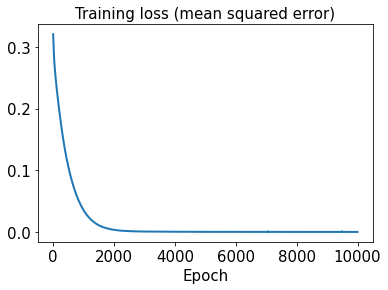

In [41]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

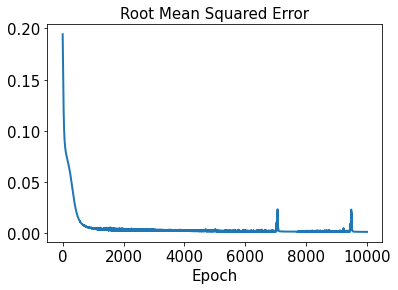

In [42]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [43]:
test_results = sd.evaluate(x_test)

1/1 [==============================] - 0s 114ms/step - loss: 1.0106e-04 - rmse: 0.0000e+00


In [44]:
decoded_train = sd.predict(x_train)

In [45]:
decoded_test = sd.predict(x_test)

In [46]:
error_train_abs = np.abs(decoded_train - y_train)

In [135]:
error_train_abs[3]

array([[1.4867465e-04, 8.2500168e-04, 3.3529234e-04, ..., 9.1262307e-04,
        3.2657332e-04, 5.6791771e-04],
       [4.1807425e-04, 1.2742325e-03, 6.1026134e-04, ..., 3.9270322e-04,
        8.9015695e-04, 4.3383430e-04],
       [1.2319713e-04, 6.3952128e-04, 5.0274772e-04, ..., 9.1751084e-05,
        4.7305926e-05, 1.9749859e-04],
       ...,
       [1.7159499e-04, 7.3347468e-04, 1.8012077e-04, ..., 7.4942783e-04,
        3.4093397e-04, 3.2810209e-04],
       [1.8507236e-04, 1.0546945e-03, 8.5341831e-04, ..., 8.8702835e-04,
        4.6921617e-04, 2.8220858e-04],
       [8.9295761e-04, 7.1607361e-04, 3.7702909e-04, ..., 8.6697910e-05,
        7.6038006e-04, 6.6727644e-04]], dtype=float32)

In [136]:
np.min(error_train_abs[3])

7.272756e-07

In [47]:
error_test_abs = np.abs(decoded_test - y_test)

In [94]:
x_train20

array([[ 5.90683e-02,  2.38036e-02, -1.43529e-01, -4.10071e-01,
         1.36380e-01,  7.30410e-03, -5.72383e-03, -1.19393e-01,
         3.45399e-01,  1.20995e-01,  1.00613e-01,  1.33782e-01,
        -1.67724e-01, -1.74455e-01,  1.65972e-01],
       [-1.01460e-02, -8.53381e-03, -1.42095e-01, -4.46055e-01,
         7.98307e-02, -1.29741e-02, -4.61719e-03, -1.16203e-01,
         4.08177e-01,  7.86259e-02,  1.46166e-01,  1.25427e-01,
        -1.72878e-01, -1.75247e-01,  1.58557e-01],
       [-1.15090e-01, -3.17947e-02, -1.44249e-01, -4.24139e-01,
         3.36049e-02, -4.04266e-02, -3.22369e-03, -1.13469e-01,
         4.38922e-01,  4.69282e-02,  1.86593e-01,  1.10774e-01,
        -1.76213e-01, -1.73007e-01,  1.47536e-01],
       [-2.12205e-01, -4.20006e-02, -1.49612e-01, -3.29639e-01,
         4.00977e-03, -7.42795e-02, -1.37865e-03, -1.11081e-01,
         4.23491e-01,  3.06506e-02,  2.20967e-01,  9.23514e-02,
        -1.77858e-01, -1.67739e-01,  1.36574e-01],
       [-2.52020e-01, -3.996

In [93]:
x_train

array([[[ 2.65753e-01],
        [ 1.01126e-01],
        [-1.47719e-01],
        [-2.55263e-01],
        [ 2.21932e-01],
        [ 3.89315e-02],
        [-1.00238e-02],
        [-1.32588e-01],
        [ 1.28543e-01],
        [ 2.00198e-01],
        [-2.86081e-02],
        [ 1.04006e-01],
        [-1.42255e-01],
        [-1.51440e-01],
        [ 1.49730e-01]],

       [[ 5.90683e-02],
        [ 2.38036e-02],
        [-1.43529e-01],
        [-4.10071e-01],
        [ 1.36380e-01],
        [ 7.30410e-03],
        [-5.72383e-03],
        [-1.19393e-01],
        [ 3.45399e-01],
        [ 1.20995e-01],
        [ 1.00613e-01],
        [ 1.33782e-01],
        [-1.67724e-01],
        [-1.74455e-01],
        [ 1.65972e-01]],

       [[-2.52020e-01],
        [-3.99666e-02],
        [-1.57509e-01],
        [-1.83538e-01],
        [-4.04024e-04],
        [-1.13777e-01],
        [ 5.62016e-04],
        [-1.09031e-01],
        [ 3.60734e-01],
        [ 3.08757e-02],
        [ 2.48391e-01],
        [ 7.

In [95]:
x_test

array([[[ 1.81556e-01],
        [ 8.62653e-02],
        [-1.48622e-01],
        [-2.85895e-01],
        [ 2.28596e-01],
        [ 2.95704e-02],
        [-8.25743e-03],
        [-1.27584e-01],
        [ 1.95863e-01],
        [ 1.93845e-01],
        [ 7.85522e-03],
        [ 1.23690e-01],
        [-1.52076e-01],
        [-1.62708e-01],
        [ 1.61112e-01]],

       [[ 1.56633e-01],
        [-1.58924e-02],
        [-1.46592e-01],
        [-1.87903e-01],
        [ 1.20277e-01],
        [ 7.21961e-02],
        [ 2.86305e-02],
        [-1.15569e-01],
        [-1.60814e-01],
        [ 1.46948e-01],
        [ 9.78153e-02],
        [-1.76974e-02],
        [-1.39492e-01],
        [ 4.66345e-02],
        [ 1.34892e-01]],

       [[-2.68267e-01],
        [ 4.22151e-04],
        [-1.22462e-01],
        [ 5.54288e-01],
        [ 1.21773e-01],
        [ 2.54106e-01],
        [-6.97419e-03],
        [-1.72102e-01],
        [-2.72504e-01],
        [ 1.87994e-01],
        [-6.22562e-02],
        [-2.

In [48]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.040471923


In [49]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.3642926


In [50]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.060753506, 0.015513948, 0.011451464, 0.14205085, 0.024201326, 0.022469884, 0.015238702, 0.018994559, 0.026747776, 0.0223547, 0.014041951, 0.021903781, 0.012408248, 0.026845006, 0.011892014, 0.039741687, 0.08566924, 0.035905864, 0.017646069, 0.017173411, 0.01676566, 0.013280346, 0.019385537, 0.023791939, 0.038996913]


In [51]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.11933488, 0.086580426, 0.17846459, 0.42656627, 0.098165095, 0.23218663, 0.9957296, 0.13852912, 0.20011052, 0.08188787, 0.27814746]


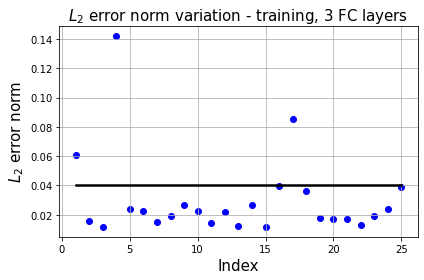

In [92]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - training, 3 FC layers', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

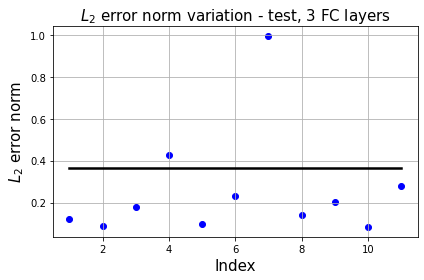

In [91]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - test, 3 FC layers', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

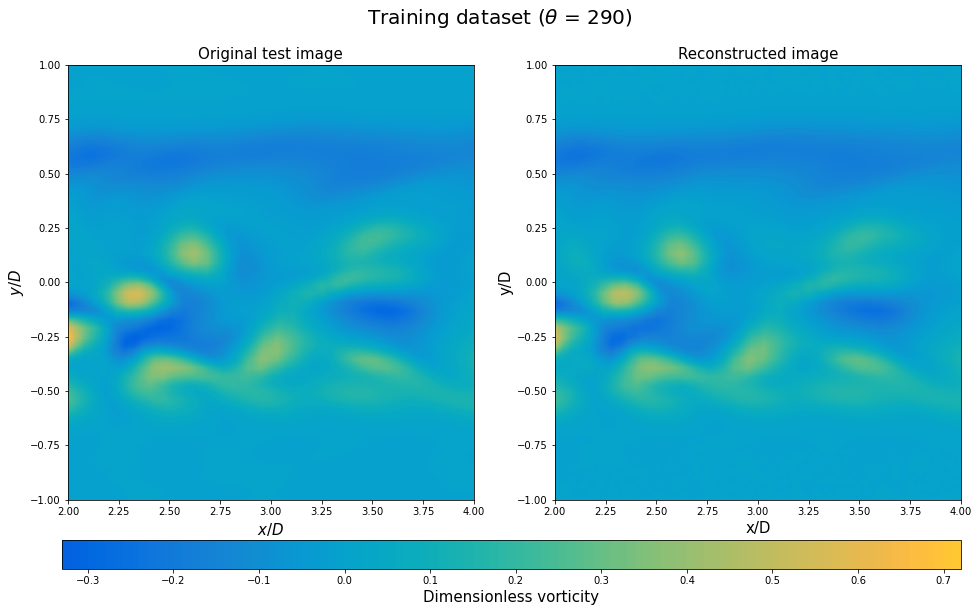

In [142]:
plt.figure(figsize=(16, 8))
y_train3_rotate = y_train[3].T.reshape(100, 100)
decoded_rotate = decoded_train[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 290)',fontsize=20)
plt.show()

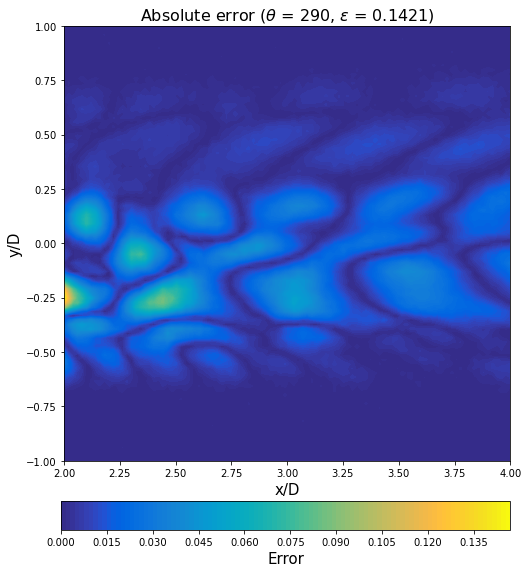

In [148]:
error_train_abs3_rotate = error_train_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 290, $\epsilon$ = %.4f)' %(l2_error_train_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

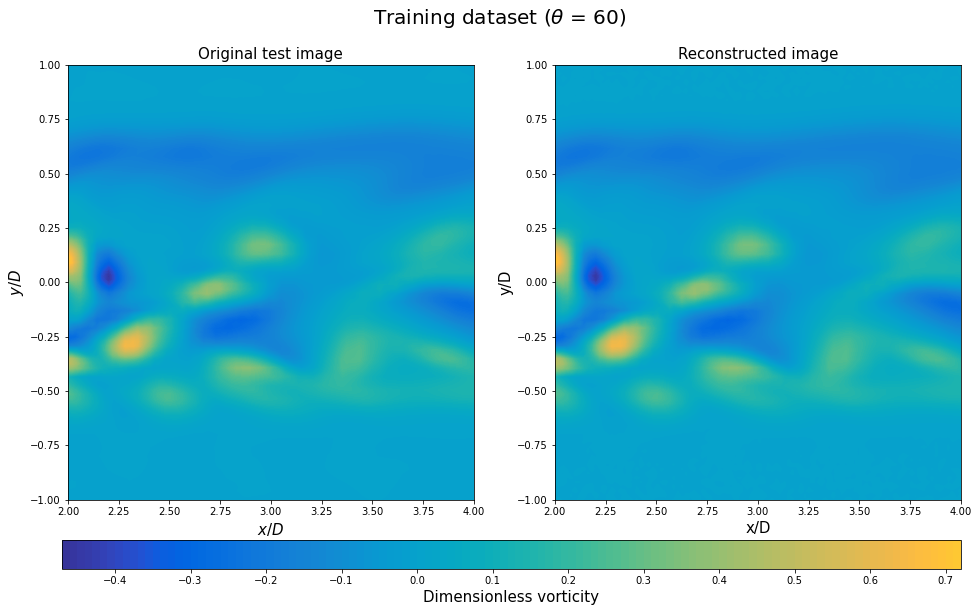

In [143]:
plt.figure(figsize=(16, 8))
y_train21_rotate = y_train[-5].T.reshape(100, 100)
decoded_rotate = decoded_train[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train21_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 60)', fontsize=20)
plt.show()

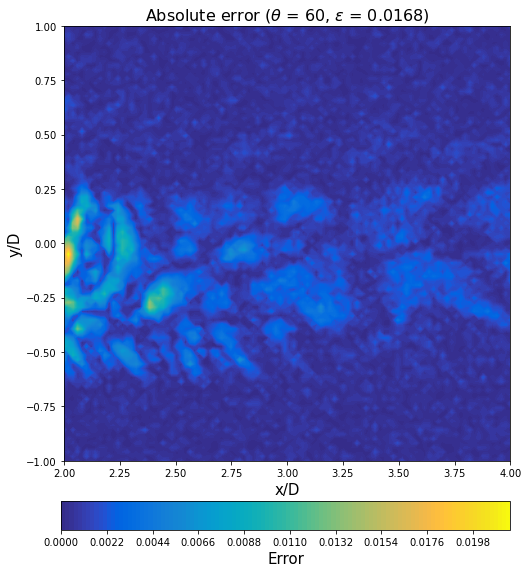

In [149]:
error_train_abs21_rotate = error_train_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs21_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 60, $\epsilon$ = %.4f)' %(l2_error_train_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

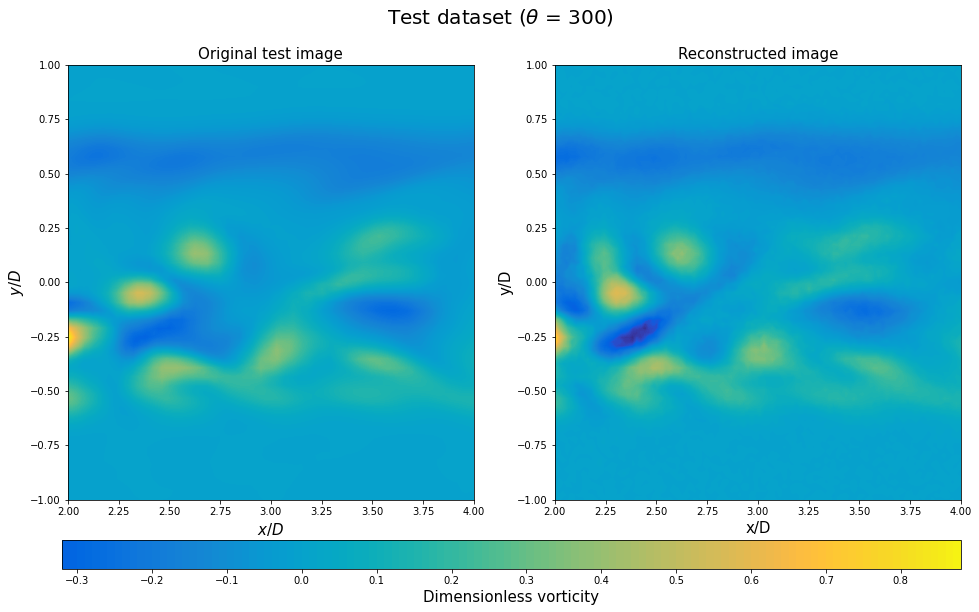

In [146]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 300)',fontsize=20)
plt.show()

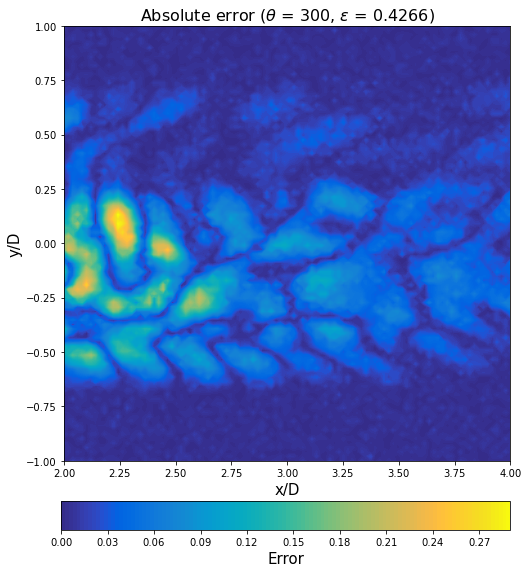

In [150]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 300, $\epsilon$ = %.4f)' %(l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

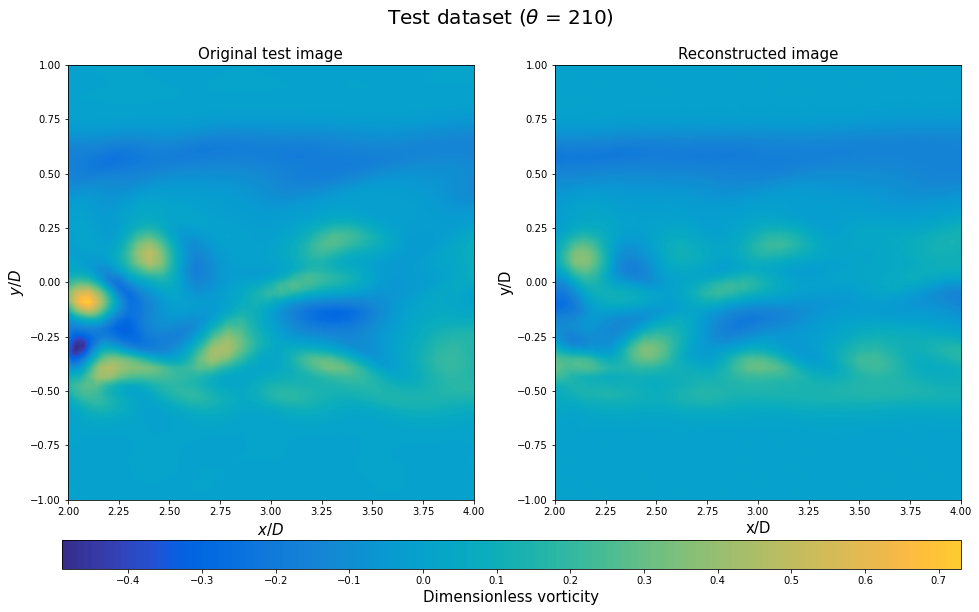

In [145]:
plt.figure(figsize=(16, 8))
y_test6_rotate = y_test[6].T.reshape(100, 100)
decoded_rotate = decoded_test[6].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test6_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 210)',fontsize=20)
plt.show()

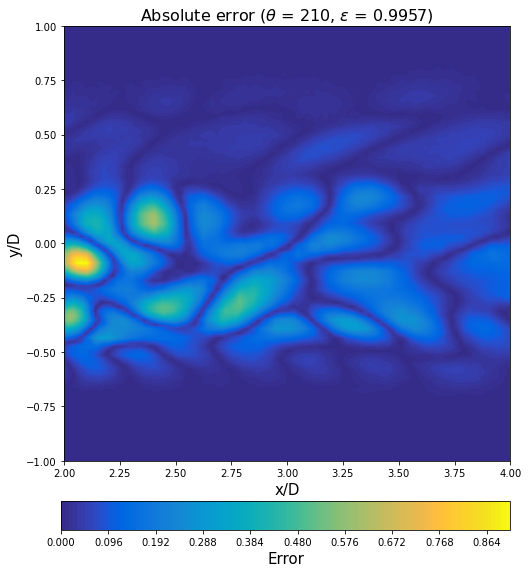

In [147]:
error_test_abs_rotate6 = error_test_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate6, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 210, $\epsilon$ = %.4f)' %(l2_error_test_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [108]:
vor_ytrain1_D200 = y_train[3].T[:, 0]
vor_ytrain1_D225 = y_train[3].T[:, 12]
vor_ytrain1_D250 = y_train[3].T[:, 24]
vor_ytrain2_D200 = y_train[-5].T[:, 0]
vor_ytrain2_D225 = y_train[-5].T[:, 12]
vor_ytrain2_D250 = y_train[-5].T[:, 24]
vor_ytest1_D200 = y_test[3].T[:, 0]
vor_ytest1_D225 = y_test[3].T[:, 12]
vor_ytest1_D250 = y_test[3].T[:, 24]
vor_ytest2_D200 = y_test[-5].T[:, 0]
vor_ytest2_D225 = y_test[-5].T[:, 12]
vor_ytest2_D250 = y_test[-5].T[:, 24]

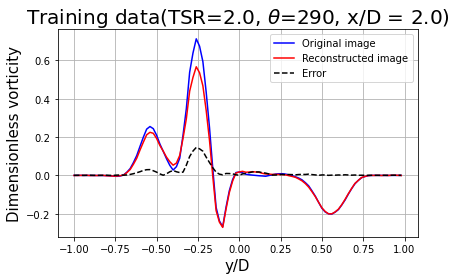

In [153]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D200.reshape(100,1)-decoded_train[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

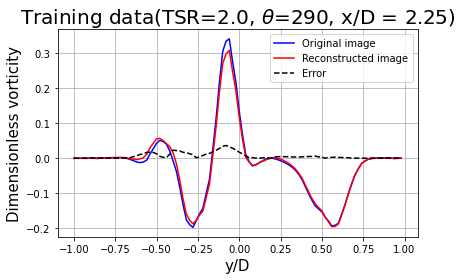

In [154]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D225.reshape(100,1)-decoded_train[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

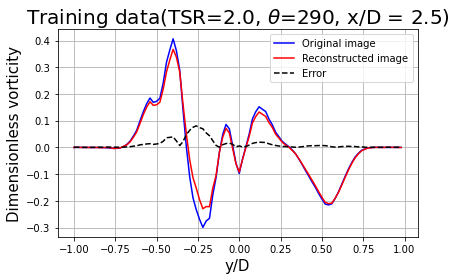

In [155]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D250.reshape(100,1)-decoded_train[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

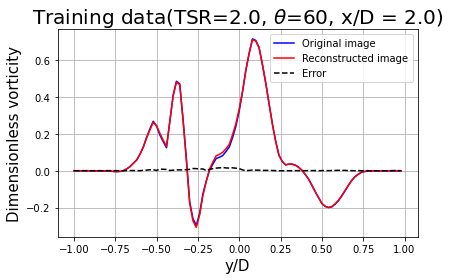

In [156]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D200.reshape(100,1)-decoded_train[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

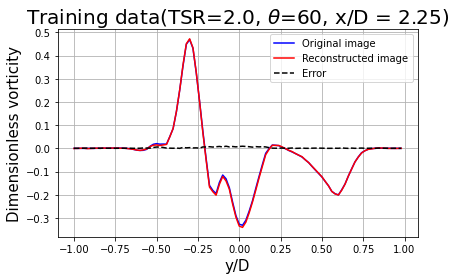

In [157]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D225.reshape(100,1)-decoded_train[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

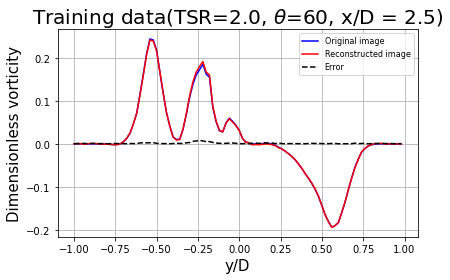

In [158]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D250.reshape(100,1)-decoded_train[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

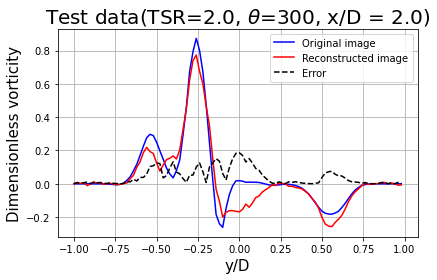

In [159]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D200.reshape(100,1)-decoded_test[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

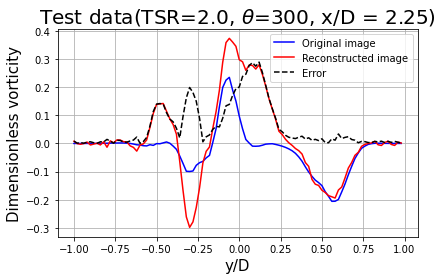

In [160]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D225.reshape(100,1)-decoded_test[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

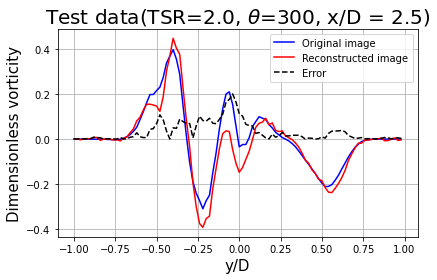

In [161]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D250.reshape(100,1)-decoded_test[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

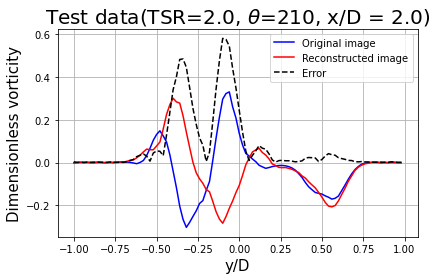

In [162]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D200.reshape(100,1)-decoded_test[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

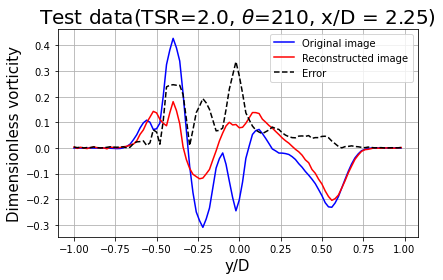

In [163]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D225.reshape(100,1)-decoded_test[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

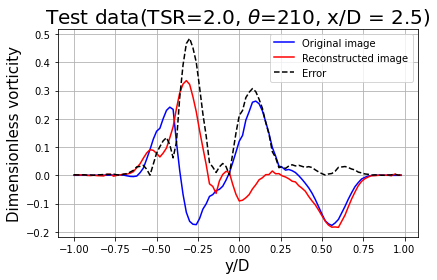

In [164]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D250.reshape(100,1)-decoded_test[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

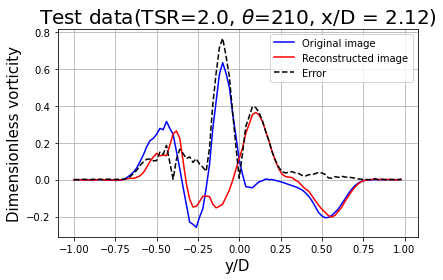

In [165]:
vor_ytest2_D212 = y_test[-5].T[:, 6]
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D212, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 6], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D212.reshape(100,1)-decoded_test[-5].T[:, 6].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.12)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()